In [2]:
import random
import matplotlib.pyplot as plt

In [19]:
def simulate_coin_toss(n=100):
    count_head_list = [0]*17
    for i in range(n):
        head_count=0
        for j in range(16):
            head_count+=random.choice([0,1])
        count_head_list[head_count]+=1
    plt.plot(count_head_list)
    

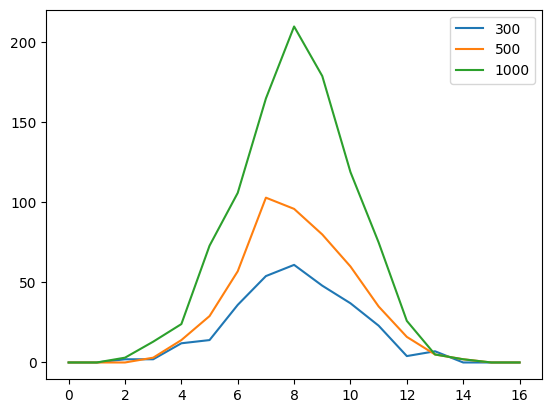

In [27]:
simulate_coin_toss(300)
simulate_coin_toss(500)
simulate_coin_toss(1000)
plt.legend([300,500,1000])

(array([ 17.,   1.,  26.,  68., 291., 193., 317.,  69.,  32.,   3.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <BarContainer object of 10 artists>)

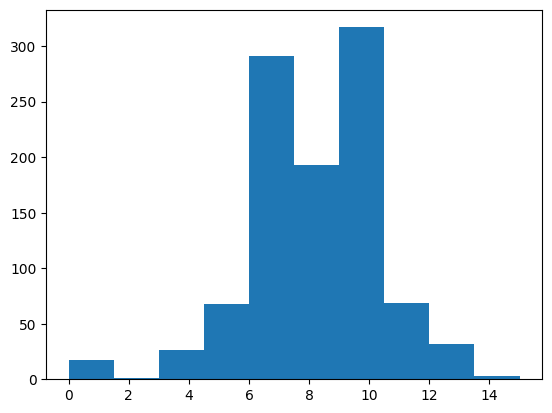

In [29]:
count_head_list = [0]*17
for i in range(1000):
    head_count=0
    for j in range(16):
        head_count+=random.choice([0,1])
    count_head_list.append(head_count)
plt.hist(count_head_list)

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scst

In [23]:
campaign_data = pd.read_excel('grocery_database.xlsx', sheet_name='campaign_data', engine='openpyxl')
campaign_data

,customer_id,campaign_name,campaign_date,mailer_type,signup_flag
0,74,delivery_club,2020-07-01,Mailer1,1
1,524,delivery_club,2020-07-01,Mailer1,1
2,607,delivery_club,2020-07-01,Mailer2,1
3,343,delivery_club,2020-07-01,Mailer1,0
4,322,delivery_club,2020-07-01,Mailer2,1
...,...,...,...,...,...
865,372,delivery_club,2020-07-01,Mailer2,1
866,104,delivery_club,2020-07-01,Mailer1,1
867,393,delivery_club,2020-07-01,Mailer2,1
868,373,delivery_club,2020-07-01,Control,0


In [32]:
campaign_data.groupby("mailer_type")["signup_flag"].value_counts(normalize=True)*100

mailer_type  signup_flag
Control      0              88.050314
             1              11.949686
Mailer1      0              67.200000
             1              32.800000
Mailer2      0              62.202381
             1              37.797619
Name: signup_flag, dtype: float64

In [44]:
campaign_data.groupby("mailer_type")["signup_flag"].value_counts().xs(1, level=1)/(campaign_data.groupby("mailer_type")["signup_flag"].value_counts().xs(0, level=1) + campaign_data.groupby("mailer_type")["signup_flag"].value_counts().xs(1, level=1))

mailer_type
Control    0.119497
Mailer1    0.328000
Mailer2    0.377976
Name: signup_flag, dtype: float64

In [45]:
scst.chi2_contingency, scst.chi2

(<function scipy.stats.contingency.chi2_contingency(observed, correction=True, lambda_=None)>,
 <scipy.stats._continuous_distns.chi2_gen at 0x283c493d360>)

In [ ]:
scst.chi2_contingency()

,Bacteria,Penicilin,Streptomycin,Neomycin,Gram Staining
0,Aerobacter aerogenes,870.000,1.00,1.600,negative
1,Brucella abortus,1.000,2.00,0.020,negative
2,Brucella anthracis,0.001,0.01,0.007,positive
3,Diplococcus pneumoniae,0.005,11.00,10.000,positive
4,Escherichia coli,100.000,0.40,0.100,negative
5,Klebsiella pneumoniae,850.000,1.20,1.000,negative
6,Mycobacterium tuberculosis,800.000,5.00,2.000,negative
7,Proteus vulgaris,3.000,0.10,0.100,negative
8,Pseudomonas aeruginosa,850.000,2.00,0.400,negative
9,Salmonella (Eberthella) typhosa,1.000,0.40,0.008,negative


,Bacteria,Gram Staining,Penicilin,Streptomycin,Neomycin
0,Aerobacter aerogenes,negative,14.197247,43.933830,41.868924
1,Brucella abortus,negative,30.103367,28.016760,41.879873
2,Brucella anthracis,positive,36.380503,31.426019,32.193478
3,Diplococcus pneumoniae,positive,49.998035,24.845236,25.156729
4,Escherichia coli,negative,18.854006,38.150566,42.995428
5,Klebsiella pneumoniae,negative,14.106715,42.551536,43.341749
6,Mycobacterium tuberculosis,negative,15.777944,39.930713,44.291343
7,Proteus vulgaris,negative,26.566106,36.716947,36.716947
8,Pseudomonas aeruginosa,negative,13.863091,39.640896,46.496013
9,Salmonella (Eberthella) typhosa,negative,27.976250,30.539688,41.484062


In [124]:
new_df.to_csv('butin\'s_modified.csv', index=False)

In [120]:
sns.set_style('darkgrid')

ConversionError: Failed to convert value(s) to axis units: 0                Aerobacter aerogenes
1                    Brucella abortus
2                  Brucella anthracis
3              Diplococcus pneumoniae
4                    Escherichia coli
5               Klebsiella pneumoniae
6          Mycobacterium tuberculosis
7                    Proteus vulgaris
8              Pseudomonas aeruginosa
9     Salmonella (Eberthella) typhosa
10          Salmonella schottmuelleri
11               Staphylococcus albus
12              Staphylococcus aureus
13              Streptococcus fecalis
14          Streptococcus hemolyticus
15             Streptococcus viridans
Name: Bacteria, dtype: object

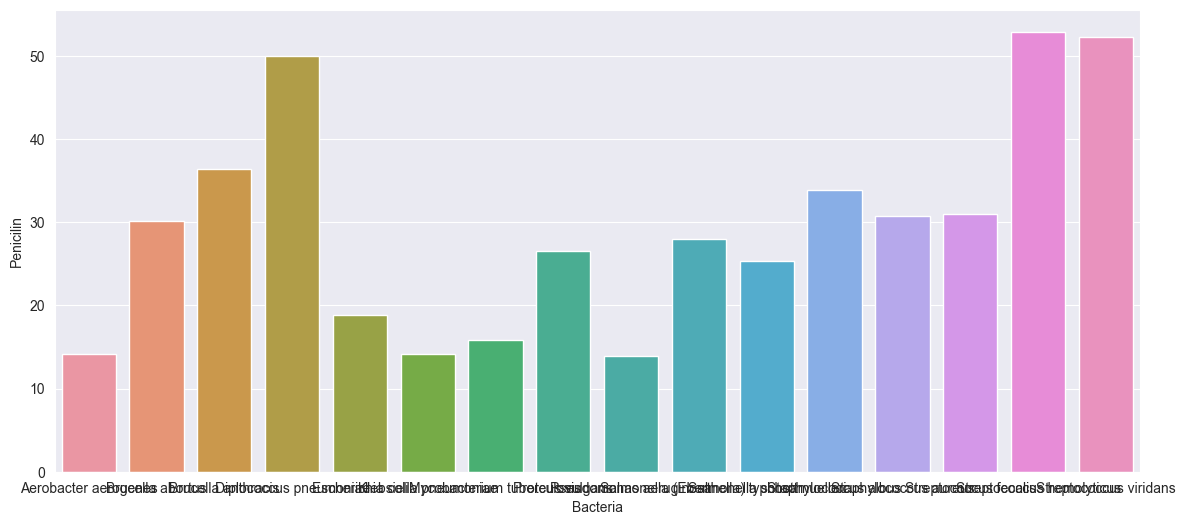

In [123]:
plt.figure(figsize=(14, 6))
sns.barplot(y=new_df['Penicilin'], x=new_df['Bacteria'])
plt.xticks(new_df['Bacteria'], rotation=45)

#sns.barplot(data=df, y='Penicilin', x='Bacteria')
#sns.barplot(data=df, y='Neomycin', x='Bacteria')
#sns.barplot(data=df, y='Streptomycin', x='Bacteria') 